In [16]:
# Created by:
# Name: REVANDO
# NIM: 2070231027

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
from base64 import b64decode

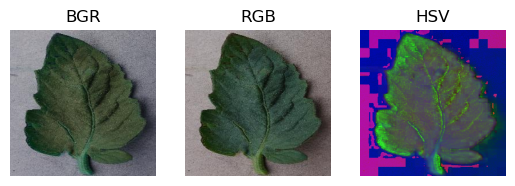

In [17]:
# Change `root_path` value based on folder where you put image datasets
root_path = 'train'
img = cv2.imread(root_path+'/Bacterial_spot/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG')
imrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imhsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('BGR')
plt.axis(False)
plt.subplot(1,3,2)
plt.imshow(imrgb)
plt.title('RGB')
plt.axis(False)
plt.subplot(1,3,3)
plt.imshow(imhsv)
plt.title('HSV')
plt.axis(False)
plt.show()

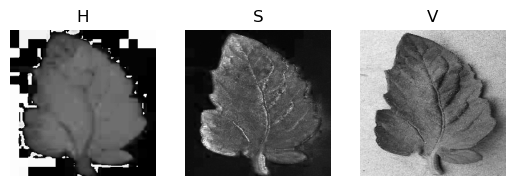

In [18]:
h, s, v = cv2.split(imhsv)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(h, cmap='gray')
plt.title('H')
plt.axis(False)
plt.subplot(1,3,2)
plt.imshow(s,cmap='gray')
plt.title('S')
plt.axis(False)
plt.subplot(1,3,3)
plt.imshow(v,cmap='gray')
plt.title('V')
plt.axis(False)
plt.show()

In [19]:
def preprocessing(img):
  imhsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  h,s,v=cv2.split(imhsv)
  imgray=s
  imgray=cv2.normalize(imgray,None,0,255,cv2.NORM_MINMAX)
  imgray=cv2.GaussianBlur(imgray,(5,5),0).astype('uint8')
  return imgray

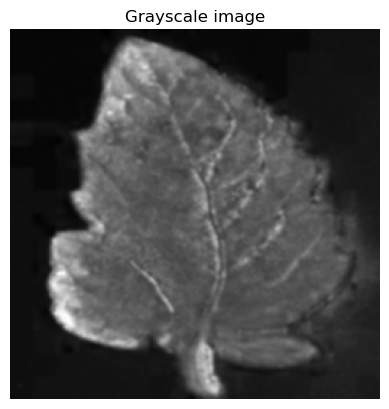

In [20]:
imgray=preprocessing(img)
plt.figure()
plt.imshow(imgray,cmap='gray')
plt.title('Grayscale image')
plt.axis(False)
plt.show()

In [21]:
def segmentation(img):
  imgray=preprocessing(img)
  ret, imbin = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  return imbin

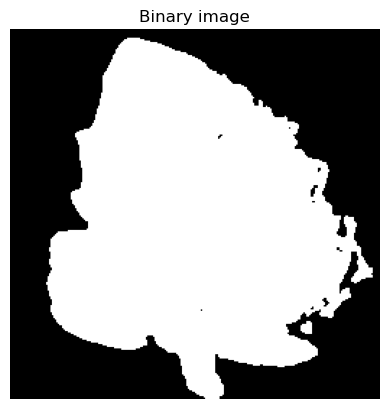

In [22]:
imbin=segmentation(img)
plt.figure()
plt.imshow(imbin,cmap='gray')
plt.title('Binary image')
plt.axis(False)
plt.show()

In [23]:
def extractFeatures(img):
  features = []
  imgray=preprocessing(img)
  imbin=segmentation(img)
  mean,stdev=cv2.meanStdDev(imgray,imbin)
  s=cv2.subtract(imgray,mean,imbin)
  skew=cv2.pow(s,3)
  skew=cv2.sumElems(skew)[0]/cv2.countNonZero(imbin)/stdev**3
  kurt=cv2.pow(s,4)
  kurt=cv2.sumElems(kurt)[0]/cv2.countNonZero(imbin)/stdev**4
  features.append(mean[0,0])
  features.append(stdev[0,0])
  features.append(skew[0,0])
  features.append(kurt[0,0])
  return features

In [24]:
extractFeatures(img)

[56.89593505859375,
 41.21412981509745,
 0.003566984170070706,
 8.733364942777967e-05]

In [25]:
features=[]
target=[]
label=0
output_dict=[]

for folder in os.listdir(root_path):
  _, file_extension = os.path.splitext(folder)
  if file_extension != '.ipynb' and folder != '.DS_Store':
    for file in os.listdir(root_path+'/'+folder):
      path=root_path+'/'+folder+'/'+file
      img=cv2.imread(path)
      try:
        features.append(extractFeatures(img))
        target.append(label)
      except Exception as err:
        # catch exception
        err

    output_dict.append({'label': label, 'name': folder})
    print(label,folder)
    label=label+1

0 Late_blight
1 Septoria_leaf_spot
2 Tomato_Yellow_Leaf_Curl_Virus
3 powdery_mildew
4 healthy
5 Early_blight
6 Target_Spot
7 Leaf_Mold
8 Tomato_mosaic_virus
9 Bacterial_spot
10 Spider_mites Two-spotted_spider_mite


In [26]:
features=np.array(features)
target=np.array(target)

In [27]:
features

array([[1.05054455e+02, 3.62796675e+01, 5.02759331e-03, 1.41887154e-04],
       [4.12503377e+01, 5.42539713e+01, 1.58417243e-03, 2.92899600e-05],
       [4.26228485e+01, 4.04992858e+01, 3.73909294e-03, 9.32836681e-05],
       ...,
       [4.59803619e+01, 3.43534689e+01, 5.69921167e-03, 1.72535464e-04],
       [5.97089539e+01, 4.45825949e+01, 2.76904749e-03, 6.31377190e-05],
       [5.47584686e+01, 4.50491759e+01, 2.74817863e-03, 6.13621707e-05]])

In [28]:
target

array([ 0,  0,  0, ..., 10, 10, 10])

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=.9,random_state=3)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(2585, 4)
(2585,)
(23265, 4)
(23265,)


In [30]:
accuracy=[]
# for k in range(1,2):
#   knn=KNeighborsClassifier(n_neighbors=k)
#   knn.fit(xtrain,ytrain)
#   ypred=knn.predict(xtest)
#   acc=100*accuracy_score(ytest,ypred)
#   accuracy.append(acc)

# plt.figure()
# plt.plot(range(1,2),accuracy,'*')
# plt.xlabel('k')
# plt.ylabel('Accuracy (%)')
# plt.show()
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
acc=100*accuracy_score(ytest,ypred)
acc

24.07049215559854